# During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA
# E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ

In an machine learning problem one of the most import steps is feature selection.Feature selection helps in simplification of model,improves accuracy,reduces training time,reduces overfitting and helps in avoiding curse of dimentionality.Here we will cover different techniques like 

1.Univariate feature Selection using p value and f Distribution 

   a)Select K Best 

   b)Select Percentile 
   
   c)Generic Univariate Select 

2.Tree Based using Random Forest

3.Regularization using Lasso 

This kernel is a work in process.If you like it please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


### Importing data set

In [2]:
df = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Dropping columns

In [3]:
df = df.drop(['id','diagnosis','Unnamed: 32'],axis=1) # Dropping Multiple Columns
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We have dropped the columns which will not be useful for us during demonstration of feature selection techniques.

### Splitting data into Independent and Dependent Features

In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

Here we are taking all the feature except fractal_dimension_worst as independent variables and fractal_dimension_worst is considered as dependent variables.

### Test Train Splitt

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state= 10)

### Linear Regression 

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)

### Mean Square Error

In [7]:
from sklearn.metrics import mean_squared_error
import math
rsme = math.sqrt(mean_squared_error(y_test,y_predict))
rsme

0.007527201380366801

# 1.Univariate Feature Selection using f Distribution

In [8]:
from sklearn.feature_selection import f_regression as fr
result = fr(X,y)
f_score = result[0]
p_values = result[1]

# Getting column names 
columns = list(X.columns)
print(" ")
print(" ")
print(" ")

print("     Features                     ","F-Score  ","P-Values")
print("     ------------                   --------  ---------")

for i in range(0,len(columns)):
    f1 = "%4.2f" % f_score[i]
    p1 = "%2.6f" % p_values[i]
    print("    ",columns[i].ljust(25),f1.rjust(12),"",p1.rjust(8))



 
 
 
     Features                      F-Score   P-Values
     ------------                   --------  ---------
     radius_mean                       0.03  0.866442
     texture_mean                      8.17  0.004408
     perimeter_mean                    1.48  0.224329
     area_mean                         0.01  0.929114
     smoothness_mean                 188.31  0.000000
     compactness_mean                507.87  0.000000
     concavity_mean                  204.59  0.000000
     concave points_mean              89.18  0.000000
     symmetry_mean                   134.91  0.000000
     fractal_dimension_mean          811.70  0.000000
     radius_se                         1.40  0.237880
     texture_se                        1.18  0.276947
     perimeter_se                      4.17  0.041637
     area_se                           0.17  0.676320
     smoothness_se                     5.90  0.015452
     compactness_se                  304.30  0.000000
     concavity_se   

So now we have the F_score and p_values for all the features.For a feature to be statistically significant the p values should be less than 5% ie 0.05.If for any feature the p values is more than 0.05 we can discard the feature as it wont be statistically significant for predicting the dependent feature.

### Comparing model performance with selected features

In [9]:
X_train_n = X_train[['texture_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','perimeter_se','smoothness_se','compactness_se','concavity_se','concave points_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst']]
X_test_n = X_test[['texture_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','perimeter_se','smoothness_se','compactness_se','concavity_se','concave points_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst']]

In [10]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train_n,y_train)
y_predict1 = lr1.predict(X_test_n)

In [11]:
from sklearn.metrics import mean_squared_error
import math
rsme1 = math.sqrt(mean_squared_error(y_test,y_predict1))
rsme1

0.008358315625380232

Doing a feature selection based on p value of 0.05 has increased rsme value.So it tells us that some features having p value more than 0.05 have statistical significance on the outcome of the prediction.So we can either change the p value or include all the features while predicting the outcome.

# Types of Univariate Feature Selection

### a)Select K Best 

In this case we will be specifying the value of K which represents the number of best features we want to select.

In [12]:
from sklearn.feature_selection import f_regression as fr
from sklearn.feature_selection import SelectKBest
selectorK = SelectKBest(score_func=fr,k=5)
X_k = selectorK.fit_transform(X,y)
#X_k

In [13]:
# Getting f_score and p values for the selected features
#f_score = X_k[0]
#p_values = X_k[1]

f_score = selectorK.scores_
p_values = selectorK.pvalues_

# Getting column names 
columns = list(X.columns)
print(" ")
print(" ")
print(" ")

print("     Features                     ","F-Score  ","P-Values")
print("     ------------                   --------  ---------")

for i in range(0,len(columns)):
    f1 = "%4.2f" % f_score[i]
    p1 = "%2.6f" % p_values[i]
    print("    ",columns[i].ljust(25),f1.rjust(12),"",p1.rjust(8))



 
 
 
     Features                      F-Score   P-Values
     ------------                   --------  ---------
     radius_mean                       0.03  0.866442
     texture_mean                      8.17  0.004408
     perimeter_mean                    1.48  0.224329
     area_mean                         0.01  0.929114
     smoothness_mean                 188.31  0.000000
     compactness_mean                507.87  0.000000
     concavity_mean                  204.59  0.000000
     concave points_mean              89.18  0.000000
     symmetry_mean                   134.91  0.000000
     fractal_dimension_mean          811.70  0.000000
     radius_se                         1.40  0.237880
     texture_se                        1.18  0.276947
     perimeter_se                      4.17  0.041637
     area_se                           0.17  0.676320
     smoothness_se                     5.90  0.015452
     compactness_se                  304.30  0.000000
     concavity_se   

In [14]:
# get the column names 
cols = selectorK.get_support(indices = True)
selectedCols = X.columns[cols].tolist()
print(selectedCols)

['compactness_mean', 'fractal_dimension_mean', 'smoothness_worst', 'compactness_worst', 'concavity_worst']


So if we were to selected 5 best features for our prediction then they will be the five features desplayed above.They are based on five lowest p values which is less than 0.05

### b)Select Percentile

In [15]:
from sklearn.feature_selection import f_regression as fr
from sklearn.feature_selection import SelectPercentile
selectorP = SelectPercentile(score_func=fr,percentile=20)
X_p = selectorP.fit_transform(X,y)

In [16]:
# get the column names 
cols_p = selectorP.get_support(indices = True)
selectedCols_p = X.columns[cols_p].tolist()
print(selectedCols_p)

['compactness_mean', 'fractal_dimension_mean', 'fractal_dimension_se', 'smoothness_worst', 'compactness_worst', 'concavity_worst']


So we have selected 20 % of the important features in our dataset.So we get a list of 6 most important features.

### c)Generic Univariate Select 

#### Based on K Best

In [17]:
from sklearn.feature_selection import f_regression as fr
from sklearn.feature_selection import GenericUnivariateSelect
selectorG1 = GenericUnivariateSelect(score_func=fr,mode='k_best',param=3)
X_g1 = selectorG1.fit_transform(X,y)

In [18]:
# get the column names 
cols_g1 = selectorG1.get_support(indices = True)
selectedCols_g1 = X.columns[cols_g1].tolist()
print(selectedCols_g1)

['compactness_mean', 'fractal_dimension_mean', 'compactness_worst']


#### Based on Percentile

In [19]:
from sklearn.feature_selection import f_regression as fr
from sklearn.feature_selection import GenericUnivariateSelect
selectorG2 = GenericUnivariateSelect(score_func=fr,mode='percentile',param=20)
X_g2 = selectorG2.fit_transform(X,y)

In [20]:
# get the column names 
cols_g2 = selectorG2.get_support(indices = True)
selectedCols_g2 = X.columns[cols_g2].tolist()
print(selectedCols_g2)

['compactness_mean', 'fractal_dimension_mean', 'fractal_dimension_se', 'smoothness_worst', 'compactness_worst', 'concavity_worst']


So we have covered different Univariate Feature selection techiniques in the above sections.

# 2.Tree Based

In [21]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed()
forest = RandomForestRegressor(n_estimators=1000)
fit = forest.fit(X_train,y_train)
accuracy = fit.score(X_test,y_test)
predict = fit.predict(X_test)
#cmatrix = confusion_matrix(y_test,predict)

#-------------------------------------------------------------------------------------------------#
# Perform k Fold cross- validation 

print('Accuracy of Random Forest: %s'% "{0:.2%}".format(accuracy))

Accuracy of Random Forest: 88.50%


In [22]:
# Feature importance 
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

Feature ranking
Feature radius_mean (0.574022)
Feature texture_mean (0.250839)
Feature perimeter_mean (0.035649)
Feature area_mean (0.015655)
Feature smoothness_mean (0.012949)
Feature compactness_mean (0.012713)
Feature concavity_mean (0.011056)
Feature concave points_mean (0.009162)
Feature symmetry_mean (0.006182)
Feature fractal_dimension_mean (0.005517)
Feature radius_se (0.005388)
Feature texture_se (0.005281)
Feature perimeter_se (0.004801)
Feature area_se (0.004490)
Feature smoothness_se (0.004372)
Feature compactness_se (0.003672)
Feature concavity_se (0.003613)
Feature concave points_se (0.003400)
Feature symmetry_se (0.003351)
Feature fractal_dimension_se (0.003334)
Feature radius_worst (0.003137)
Feature texture_worst (0.003081)
Feature perimeter_worst (0.003074)
Feature area_worst (0.002841)
Feature smoothness_worst (0.002819)
Feature compactness_worst (0.002809)
Feature concavity_worst (0.002787)
Feature concave points_worst (0.002218)
Feature symmetry_worst (0.001786)


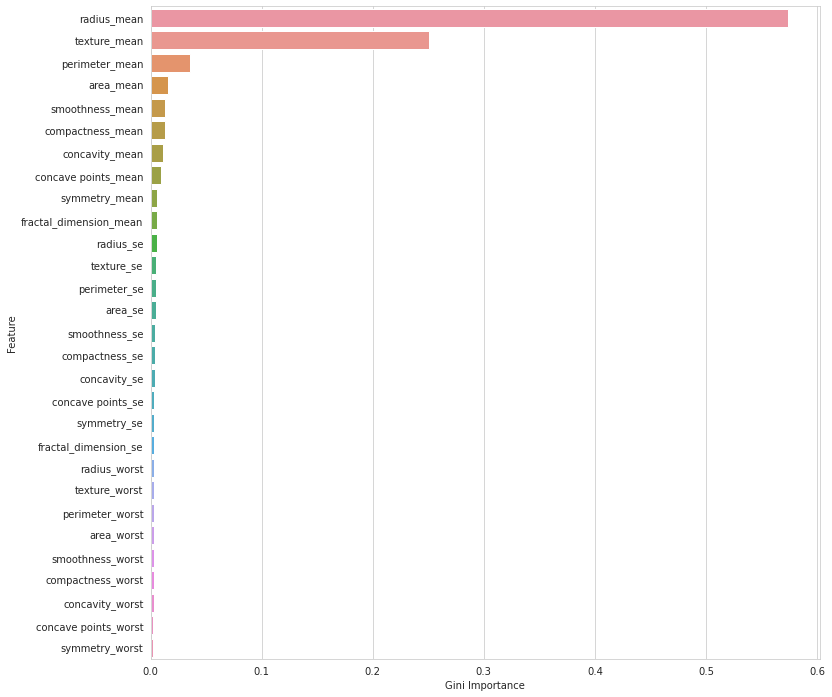

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Feature ranking")
for f in range(X.shape[1]):
    print("Feature %s (%f)" % (list(X)[f],importances[indices[f]]))

feat_imp = pd.DataFrame({'Feature':list(X),
                        'Gini importance':importances[indices]})
plt.rcParams['figure.figsize']=(12,12)
sns.set_style('whitegrid')
ax = sns.barplot(x='Gini importance',y='Feature',data=feat_imp)
ax.set(xlabel='Gini Importance')
pass

Using the Random Forest Regressor we have done feature selection based on their importance.

# 3.Lasso Regression

In [24]:
from sklearn.linear_model import Lasso 
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(Lasso(alpha=0.005,random_state=0))
sel_.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [25]:
sel_.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False])

In [26]:
selected_feat=X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('Selected features: {}'.format(len(selected_feat)))
print('Features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_==0)))

total features: 29
Selected features: 5
Features with coefficients shrank to zero: 24


In [27]:
selected_feat

Index(['area_mean', 'area_se', 'texture_worst', 'perimeter_worst',
       'area_worst'],
      dtype='object')

In [28]:
selected_feat = X_train.columns[(sel_.estimator_.coef_!=0).ravel().tolist()]
selected_feat

Index(['area_mean', 'area_se', 'texture_worst', 'perimeter_worst',
       'area_worst'],
      dtype='object')

We have see how we are able to do a feature slection using Lasso Regression.By changing the value of alpha we will be ablw to get desired number of featured for our ML Model.

# Conclusion 

In the Kernel we have covered Univariate,Tree based and Lasso feature selection techniques for Regression Problems,I hope this kernel will be useful for you in future to carry out activity of feature selection on your dataset.